In [1]:
from collections import defaultdict
from typing import Dict, List, Tuple, Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib.ticker import EngFormatter

from utils.utils import get_labels_distribution, invert_dict, plot_data_distribution

In [2]:
labels = {
    "COVID": "COVID-19",
    "Lung_Opacity": "Lung Opacity",
    "Normal": "Normal",
    "Viral Pneumonia": "Viral Pneumonia"
}

num_clients = 2

file_paths = {
    # "1": f"../datasets/csv_splits/{num_clients}_clients/unbalanced_all_classes/CXR_covid_train_client_1.csv",
    # "2": f"../datasets/csv_splits/{num_clients}_clients/unbalanced_all_classes/CXR_covid_train_client_2.csv",
    # "1": f"../datasets/csv_splits/{num_clients}_clients/unbalanced_missing_classes/2co-lo-vp/CXR_covid_train_client_1.csv",
    # "2": f"../datasets/csv_splits/{num_clients}_clients/unbalanced_missing_classes/2co-lo-vp/CXR_covid_train_client_2.csv",
    "2": f"../datasets/csv_splits/{num_clients}_clients/unbalanced_missing_classes/1co_2lo-vp/train/CXR_covid_train_client_2.csv",
    "1": f"../datasets/csv_splits/{num_clients}_clients/unbalanced_missing_classes/1co_2lo-vp/train/CXR_covid_train_client_1.csv",
}

if num_clients >= 4:
    # file_paths["3"] = f"../datasets/csv_splits/{num_clients}_clients/unbalanced_all_classes/CXR_covid_train_client_3.csv"
    # file_paths["4"] = f"../datasets/csv_splits/{num_clients}_clients/unbalanced_all_classes/CXR_covid_train_client_4.csv"
    # file_paths["3"] = f"../datasets/csv_splits/{num_clients}_clients/unbalanced_missing_classes/one_per_client/CXR_covid_train_client_3.csv"
    # file_paths["4"] = f"../datasets/csv_splits/{num_clients}_clients/unbalanced_missing_classes/one_per_client/CXR_covid_train_client_4.csv"

    file_paths["3"] = f"../datasets/csv_splits/{num_clients}_clients/unbalanced_all_classes/CXR_covid_train_client_3.csv"
    file_paths["4"] = f"../datasets/csv_splits/{num_clients}_clients/unbalanced_all_classes/CXR_covid_train_client_4.csv"

if num_clients == 8:
    # file_paths["5"] = f"../datasets/csv_splits/{num_clients}_clients/unbalanced_all_classes/CXR_covid_train_client_5.csv"
    # file_paths["6"] = f"../datasets/csv_splits/{num_clients}_clients/unbalanced_all_classes/CXR_covid_train_client_6.csv"
    # file_paths["7"] = f"../datasets/csv_splits/{num_clients}_clients/unbalanced_all_classes/CXR_covid_train_client_7.csv"
    # file_paths["8"] = f"../datasets/csv_splits/{num_clients}_clients/unbalanced_all_classes/CXR_covid_train_client_8.csv"

    # file_paths["5"] = f"../datasets/csv_splits/{num_clients}_clients/unbalanced_missing_covid/CXR_covid_train_client_5.csv"
    # file_paths["6"] = f"../datasets/csv_splits/{num_clients}_clients/unbalanced_missing_covid/CXR_covid_train_client_6.csv"
    # file_paths["7"] = f"../datasets/csv_splits/{num_clients}_clients/unbalanced_missing_covid/CXR_covid_train_client_7.csv"
    # file_paths["8"] = f"../datasets/csv_splits/{num_clients}_clients/unbalanced_missing_covid/CXR_covid_train_client_8.csv"
    
    file_paths["5"] = f"../datasets/csv_splits/{num_clients}_clients/unbalanced_all_classes/CXR_covid_train_client_5.csv"
    file_paths["6"] = f"../datasets/csv_splits/{num_clients}_clients/unbalanced_all_classes/CXR_covid_train_client_6.csv"
    file_paths["7"] = f"../datasets/csv_splits/{num_clients}_clients/unbalanced_all_classes/CXR_covid_train_client_7.csv"
    file_paths["8"] = f"../datasets/csv_splits/{num_clients}_clients/unbalanced_all_classes/CXR_covid_train_client_8.csv"

# file_paths = {" ": f"../datasets/COVID-19_Radiography_Dataset.csv"}

# data = {key: pd.read_csv(value)["Finding Labels"] for key, value in file_paths.items()}
data = {key: get_labels_distribution(pd.read_csv(value), "Finding Labels", labels) for key, value in file_paths.items()}
data = invert_dict(data)

In [3]:
# data = {
#     "COVID-19": {"1": 0},
#     "Lung Opacity": {"1": 2865},
#     "Normal": {"1": 4651},
#     "Viral Pneumonia": {"1": 0},
# }

In [4]:
def get_percentage(data_dict: Dict[str, Dict[str, int]]) -> Dict[str, Dict[str, float]]:
    percentage_dict = {}
    for key, value in data_dict.items():
        total = sum(value.values())
        percentage_dict[key] = {k: round((v/total) * 100, 2) for k, v in value.items()}
    return percentage_dict

# data_percentage = get_percentage(invert_dict(data))
data_percentage = get_percentage(data)
data_percentage

{'COVID-19': {'2': 100.0},
 'Normal': {'2': 25.52, '1': 74.48},
 'Lung Opacity': {'1': 100.0},
 'Viral Pneumonia': {'1': 100.0}}

In [8]:
def load_style(font_name="Arial", palette="muted", n_colors=None, font_scale=1.3):
    sns.set_theme(
        context="notebook",
        style="whitegrid", 
        # palette="colorblind",
        font=font_name, 
        font_scale=font_scale
    )
    colors = sns.color_palette(palette, n_colors=n_colors)
    
    plt.rcParams.update({
        # "font.family": "sans-serif",
        # "font.sans-serif": ["Helvetica"],
        'mathtext.fontset': 'custom',
        'mathtext.rm': f'{font_name}',
        'mathtext.it': f'{font_name}:italic',
        'mathtext.bf': f'{font_name}:bold'
    })

    # Use LaTeX for text
    # plt.rcParams.update({
    #     "text.usetex": True,
    #     "font.family": "Helvetica"
    # })
    
    return colors


def plot_data_distribution(
    data: Dict[str, Dict[str, int]],
    title: str,
    xy_labels: Dict[str, str] = None,
    plot_size: Tuple[int, int] = (12, 8),
):
    """
    Plot the distribution of the data with clients as y-labels and classes as labels.

    Args:
    -----
        data (Dict[str, Dict[str, int]]): The data to plot.
        title (str): The title of the plot.
        xy_labels (Dict[str, str]): Labels for x and y axes.
        plot_size (Tuple[int, int]): The size of the plot.
    """
    if not isinstance(data, dict):
        raise ValueError("Data must be a dictionary.")
        
    # Ensure xy_labels is a dictionary
    xy_labels = xy_labels or {}

    # Create the plot figure
    fig, ax = plt.subplots(figsize=plot_size, dpi=300)

    # Convert the nested dictionary into a DataFrame.
    # Here, the keys of `data` become columns (categories) and the inner keys (clients) become the index.
    # Replace missing values (clients missing for a category) with 0
    df = pd.DataFrame(data)
    df = df.fillna(0)
    
    plot_df = df.stack().reset_index()
    plot_df.columns = ['Client', 'Category', 'Value']
    plot_df = plot_df.sort_values(by=["Client", "Category"])
    
    style = load_style(font_name="DejaVu Sans", palette="colorblind", n_colors=len(data.keys()))
    
    sns.barplot(
        data=plot_df,
        x="Value",
        y="Client",
        hue="Category",
        palette=style,
        width=0.4,
        ax=ax,
    )
    
    # Format the x-axis using engineering notation
    formatter = EngFormatter()
    
    # Customize plot
    fontsize = 16
    ax.set_title(title)
    ax.set_xlabel(xy_labels.get("x", "Values"))
    ax.set_ylabel(xy_labels.get("y", "Clients"))
    ax.legend(
        # title="Class",
        # fontsize=14,
        # prop={"size": fontsize}
    )
    # ax.set_xlim(0, 8400)
    # ax.set_xlim(0, 4500)
    
    ax.xaxis.set_major_formatter(formatter)
    
    plt.tight_layout()
    plt.show()

    # Save the plot to svg
    fig.savefig(f"../results/plots/data_distribution/2_clients/{title}.svg", format="svg", bbox_inches="tight")

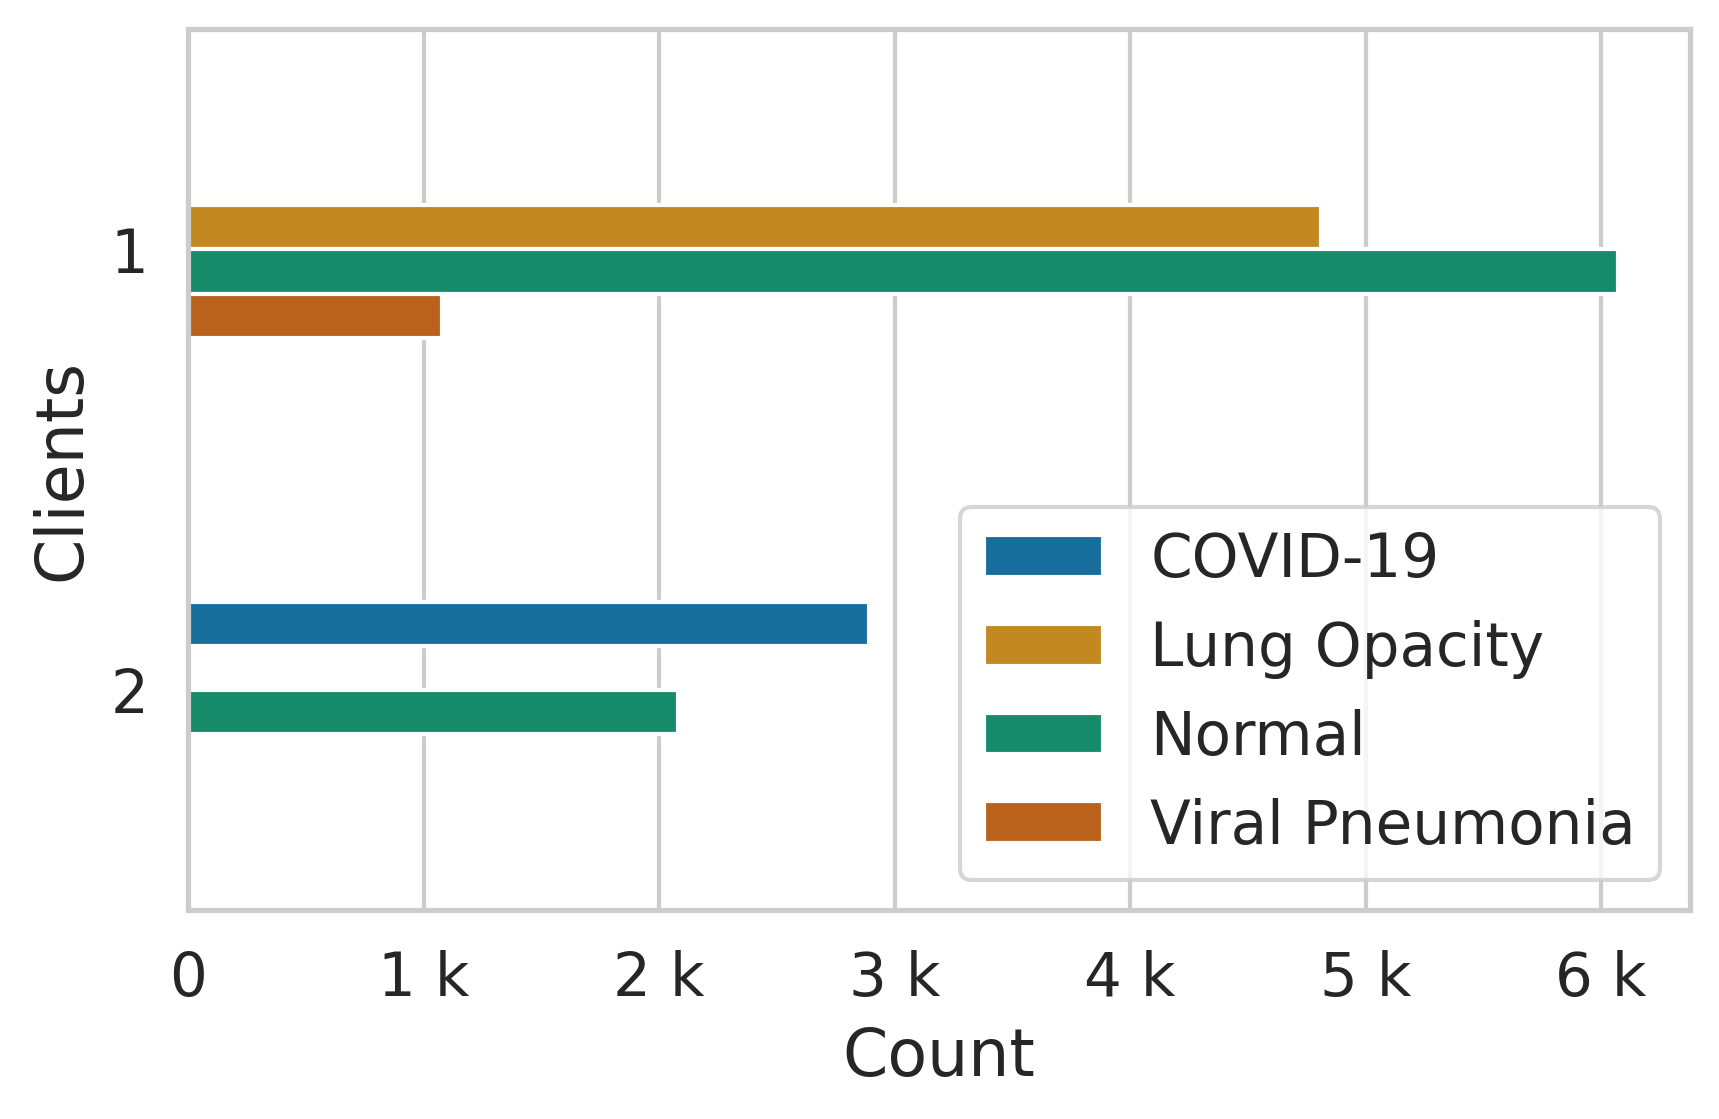

In [9]:
plot_data_distribution(data, title="", xy_labels={"x": "Count", "y": "Clients"}, plot_size=(6, 4))

In [22]:
def plot_evolution_curves(data: pd.DataFrame, xy_labels: Dict[str, str] = None, legends: dict = None, plot_size: Tuple[int, int] = (12, 8), title: str = "", fontsize: int = 12):
    """Plot the evolution of curves (loss or score).

    Args:
    -----
        data (pd.DataFrame): Data to plot (multiple columns).
        labels (Dict[str, str]): Labels for the classes.
        title (str): Title of the plot.
    """
    fig, ax = plt.subplots(figsize=plot_size, dpi=300)

    style = load_style(font_name="DejaVu Sans", palette="colorblind", n_colors=len(data.columns), font_scale=1.3)

    # # Sort the columns by their name
    # data = data.sort_index(axis=1)
    
    sns.lineplot(
        data=data,
        palette=style,
        ax=ax
    )

    ax.set_title(title)
    if xy_labels:
        ax.set_xlabel(xy_labels["x"])
        ax.set_ylabel(xy_labels["y"])
    # ax.tick_params(axis="both", which="major")

    # Comment the 3 lines below when using CT heart loss files
    handles, _legends = ax.get_legend_handles_labels()
    legends = [legends[leg] for leg in _legends]
    ax.legend(handles=handles, labels=legends)

    # Set x-axis limits
    # ax.set_xlim(0, data.shape[0] - 1)
    ax.set_xlim(0, 65)
    ax.set_ylim(0, 1.5)
    plt.show()

    return fig, ax


def filter_data(data: Dict[str, pd.DataFrame], pattern: List[str], columns_names: Dict[str, str]) -> Dict[str, pd.DataFrame]:
    """Filter the data to keep only the columns of interest.
    All the columns that contain the pattern will be dropped.

    Args:
    -----
        data (Dict[str, pd.DataFrame]): Data to filter.
        pattern (List[str]): Pattern to remove from the columns.
        columns_names (Dict[str, str]): dictionnary with the new column names as keys and the old column names as values.

    Returns:
    --------
        Dict[str, pd.DataFrame]: Filtered data.
    """
    filtered_data = {}
    for key, value in data.items():
        filtered_data[key] = value.drop(columns=[col for col in value.columns if any([p in col for p in pattern])])
        
        # # Uncomment both lines below when comparing CL and FL results or when using mean loss files
        # Filtered FL
        filtered_data[key].set_index("Step", inplace=True)
        # # Unfiltered CT
        # filtered_data[key].set_index("trainer/global_step", inplace=True)
        filtered_data[key] = filtered_data[key].rename(columns=columns_names[key])

    return filtered_data
    

def merge_data(data: Dict[str, pd.DataFrame], sort: bool = False, reindex: bool = False) -> pd.DataFrame:
    """Merge the data of all the clients into a single DataFrame.
    As each DataFrames have the same 'Step' column, only the first one will be kept.

    Args:
    -----
        data (Dict[str, pd.DataFrame]): Data to merge.
        sort (bool): If True, sort the columns by their name.
        reindex (bool): If True, reassign the steps to go from 0 to n.

    Returns:
    --------
        pd.DataFrame: Merged data.
    """
    df = pd.concat(data.values(), axis=1)
    # df = df.loc[:, ~df.columns.duplicated()]

    if reindex:
        df = df.reset_index(drop=True)
        df.index = np.arange(0, len(df))
        df.index.name = "Step"

    if sort:
        df = df.sort_index(axis=1)
        
    return df

In [ ]:
# _test = pd.read_csv(f"../results/curves/non_iid_experiments/centralized_1all_ocpc_cl1_{curve_type}.csv")
# # Replace "epoch" by "Step" in the DataFrame
# _test = _test.rename(columns={"epoch": "Step"})
# # Save the DataFrame to a CSV file
# _test.to_csv(f"../results/curves/non_iid_experiments/centralized_1all_ocpc_cl1_{curve_type}_clean.csv", index=False)

In [20]:
curve_type = "loss"

curves_paths = {
    # # CT scans
    # "ct_loss": f"../results/fl/ct_heart_{curve_type}_clean.csv",
    # # "fl_2_clients_global_ct_unbalanced_all_classes": f"../results/fl/ct_heart_{curve_type}_2_clients_cxr_balanced_all_classes.csv",
    # "fl_2_clients_global_ct_unbalanced_all_classes": f"../results/fl/ct_heart_{curve_type}_2_clients_cxr_balanced_all_classes_clean.csv",

    # # Only for CXR (CT below)
    # "cl_loss": f"../results/fl/cl_{curve_type}_latest.csv",
    # "fl_2_clients_global_cxr_balanced_all_classes": f"../results/fl/2_clients/paper/csv/2_clients_global_cxr_balanced_all_classes_{curve_type}.csv",
    # "fl_4_clients_global_cxr_balanced_all_classes": f"../results/fl/4_clients/paper/csv/4_clients_global_cxr_balanced_all_classes_{curve_type}.csv",
    # "fl_8_clients_global_cxr_balanced_all_classes": f"../results/fl/8_clients/paper/csv/8_clients_global_cxr_balanced_all_classes_{curve_type}.csv",
    
    # "2_clients_global_cxr_balanced_all_classes": f"../results/curves/2_clients_cxr_balanced_all_classes_mean.csv",
    # "2_clients_global_cxr_unbalanced_all_classes_loss": f"../results/curves/2_clients_global_cxr_class_ratio_unbalanced_all_classes_{curve_type}_mean.csv",

    # "2_clients_global_cxr_balanced_all_classes": f"../results/fl/2_clients/paper/csv/2_clients_global_cxr_balanced_all_classes_{curve_type}.csv",
    # "2_clients_global_cxr_unbalanced_all_classes_loss": f"../results/fl/2_clients/paper/csv/2_clients_global_cxr_unbalanced_all_classes_{curve_type}.csv",
    # "2_clients_global_cxr_balanced_missing_2CO_loss": f"../results/fl/2_clients/paper/csv/2_clients_global_cxr_balanced_missing_2CO_{curve_type}.csv",
    # "2_clients_global_cxr_balanced_missing_CO-LO_loss": f"../results/fl/2_clients/paper/csv/2_clients_global_cxr_balanced_missing_CO-LO_{curve_type}.csv",

    # "4_clients_cxr_balanced_all_classes": f"../results/curves/4_clients_cxr_balanced_all_classes_mean.csv",
    # "4_clients_global_cxr_class_ratio_unbalanced_all_classes_loss": f"../results/curves/4_clients_global_cxr_class_ratio_unbalanced_all_classes_loss_mean.csv",
    # "4_clients_global_cxr_unbalanced_all_classes_loss": f"../results/fl/4_clients/paper/csv/4_clients_global_cxr_class_ratio_unbalanced_all_classes_{curve_type}.csv",
    # "4_clients_global_cxr_unbalanced_missing_2LO_3N_loss": f"../results/fl/4_clients/paper/csv/4_clients_global_cxr_unbalanced_missing_2LO_3N_{curve_type}.csv",
    # "4_clients_global_cxr_balanced_missing_2CO-LO_4N_loss": f"../results/fl/4_clients/paper/csv/4_clients_global_cxr_balanced_missing_2CO-LO_4N_{curve_type}.csv",

    # "8_clients_global_cxr_balanced_all_classes": f"../results/fl/8_clients/paper/csv/8_clients_global_cxr_balanced_all_classes_{curve_type}.csv",
    # "8_clients_global_cxr_class_ratio_unbalanced_all_classes": f"../results/curves/8_clients_global_cxr_class_ratio_unbalanced_all_classes_{curve_type}_mean.csv",

    # Non-IID experiments
    # "2_clients_cxr_unbalanced_missing_2no": f"../results/curves/non_iid_experiments/2_clients/2_clients_cxr_unbalanced_missing_2no_{curve_type}.csv",
    # "2_clients_cxr_unbalanced_missing_1co-lo-vp": f"../results/curves/non_iid_experiments/2_clients/2_clients_cxr_unbalanced_missing_2co-lo-vp_{curve_type}.csv",
    # "2_clients_cxr_unbalanced_missing_2co-vp": f"../results/curves/non_iid_experiments/2_clients/2_clients_cxr_unbalanced_missing_2co-vp_{curve_type}.csv",
    # "2_clients_cxr_unbalanced_missing_2co-vp_RS_loss": f"../results/curves/non_iid_experiments/2_clients/2_clients_cxr_unbalanced_missing_2co-vp_RS_{curve_type}.csv",
    # "2_clients_cxr_balanced_missing_two_per_client_RS": f"../results/curves/non_iid_experiments/2_clients/2_clients_global_cxr_class_ratio_balanced_missing_two_per_client_{curve_type}_mean.csv",
    # "2_clients_cxr_unbalanced_missing_2co-vp_RS_new": f"../results/curves/non_iid_experiments/2_clients/2_clients_cxr_unbalanced_missing_2co-vp_RS_new_{curve_type}.csv",
    # "2_clients_cxr_unbalanced_missing_2co-vp_loss": f"../results/curves/non_iid_experiments/2_clients/2_clients_cxr_unbalanced_missing_2co-vp_{curve_type}.csv",
    # "2_clients_cxr_unbalanced_missing_two_per_client_loss": f"../results/curves/non_iid_experiments/2_clients/2_clients_cxr_unbalanced_missing_two_per_client_{curve_type}.csv",
    # "4_clients_cxr_unbalanced_missing_ocpc_RS_loss": f"../results/curves/non_iid_experiments/4_clients/4_clients_cxr_unbalanced_missing_ocpc_RS_{curve_type}.csv",
    "centralized_1all_ocpc_cl1_loss": f"../results/curves/non_iid_experiments/centralized_1all_ocpc_cl1_{curve_type}_clean.csv",

    # "monitoring_test": f"../results/curves/non_iid_experiments/monitoring_test_balanced_{curve_type}.csv",
    # "4_clients_cxr_unbalanced_missing_ocpc_loss": f"../results/curves/non_iid_experiments/4_clients/4_clients_cxr_unbalanced_missing_ocpc_{curve_type}.csv",
    # "4_clients_cxr_unbalanced_missing_ocpc_RS_loss": f"../results/curves/non_iid_experiments/4_clients/4_clients_cxr_unbalanced_missing_ocpc_RS_{curve_type}.csv",
}

curves = {key: pd.read_csv(value) for key, value in curves_paths.items()}

columns = {
    key: {
        # col: key
        col: col.split("-")[1].strip()
        for col in value.columns
        if col.startswith("Group") and col.endswith("loss")
    }
    for key, value in curves.items()
}
# print(columns)

legends = {
    # # CT scans
    # "ct_loss": "FL - 2 clients (balanced)",
    # "fl_2_clients_global_ct_unbalanced_all_classes": "FL - 2 clients (unbalanced)",

    # # # CXR
    # "cl_loss": "CL",
    # "fl_2_clients_global_cxr_balanced_all_classes": "FL - 2 clients",
    # "fl_4_clients_global_cxr_balanced_all_classes": "FL - 4 clients",
    # "fl_8_clients_global_cxr_balanced_all_classes": "FL - 8 clients",

    # "2_clients_global_cxr_balanced_all_classes": "FL - 2 clients (balanced)",
    # "2_clients_global_cxr_unbalanced_all_classes_loss": "FL - 2 clients (unbalanced)",
    # # "2_clients_global_cxr_balanced_missing_2CO_loss": "FL - 2 clients (data configuration (b))", # target: CO
    # # "2_clients_global_cxr_balanced_missing_CO-LO_loss": "FL - 2 clients (data config. (c))", # target: CO and LO

    # "4_clients_cxr_balanced_all_classes": "FL - 4 clients (balanced)",
    # "4_clients_global_cxr_class_ratio_unbalanced_all_classes": "FL - 4 clients (unbalanced)",
    # # "4_clients_global_cxr_unbalanced_missing_2LO_3N_loss": "FL - 4 clients (data config. (e))", # target: LO and N
    # # "4_clients_global_cxr_balanced_missing_2CO-LO_4N_loss": "FL - 4 clients (data config. (f))" # target: CO, LO and N

    # "8_clients_global_cxr_balanced_all_classes": "FL - 8 clients (balanced)",
    # "8_clients_global_cxr_class_ratio_unbalanced_all_classes": "FL - 8 clients (unbalanced)"

    # # Non-IID experiments
    # "global_loss": "Global",
    # # "Averaged loss": "Average",
    # "local_1_validation_loss": "Client 1",
    # "local_2_validation_loss": "Client 2",
    # "local_3_validation_loss": "Client 3",
    # "local_4_validation_loss": "Client 4",
    "val_loss": "Validation loss",
}

# Uncomment the following 2 lines when using CXR curves
curves = filter_data(curves, ["MIN", "MAX", " _step"], columns)
curves = merge_data(curves, sort=True, reindex=True)

# # Uncomment the following line when using CT scans curves
# curves = pd.read_csv(f"../results/fl/ct_heart_{curve_type}.csv")

# # Uncomment the following line when using files containing Step
# curves.set_index("Step", inplace=True)

In [52]:
# Add mean of local losses to the DataFrame
# curves["Averaged loss"] = curves.loc[:, ["local_1_validation_loss", "local_2_validation_loss"]].mean(axis=1)
# curves = curves.sort_index(axis=1)

curves

global_curve = curves.loc[:, ["global_loss"]]
local_curves = curves.drop(columns=["global_loss"])
global_curve = global_curve.dropna()
global_curve.index = np.arange(0, len(global_curve))
local_curves = local_curves.dropna()
local_curves.index = np.arange(0, len(local_curves))

# Concatenate the global and local curves
_curves = pd.concat([global_curve, local_curves], axis=1)
_curves.index.name = "Step"
_curves

,global_loss,local_1_validation_loss,local_2_validation_loss,local_3_validation_loss,local_4_validation_loss
Step,,,,,
0,1.720995,2.054550,1.154726,0.063993,3.278745
1,1.474594,1.317922,0.517687,0.068640,3.190807
2,1.570031,1.047746,0.378287,0.033462,3.095083
3,1.593431,0.806424,0.260737,0.021089,2.856632
4,1.602291,0.612616,0.173456,0.013881,2.579821
...,...,...,...,...,...
65,1.245436,0.000396,0.000149,0.000052,0.003950
66,1.244599,0.000387,0.000145,0.000051,0.003788
67,1.245067,0.000376,0.000138,0.000049,0.003547


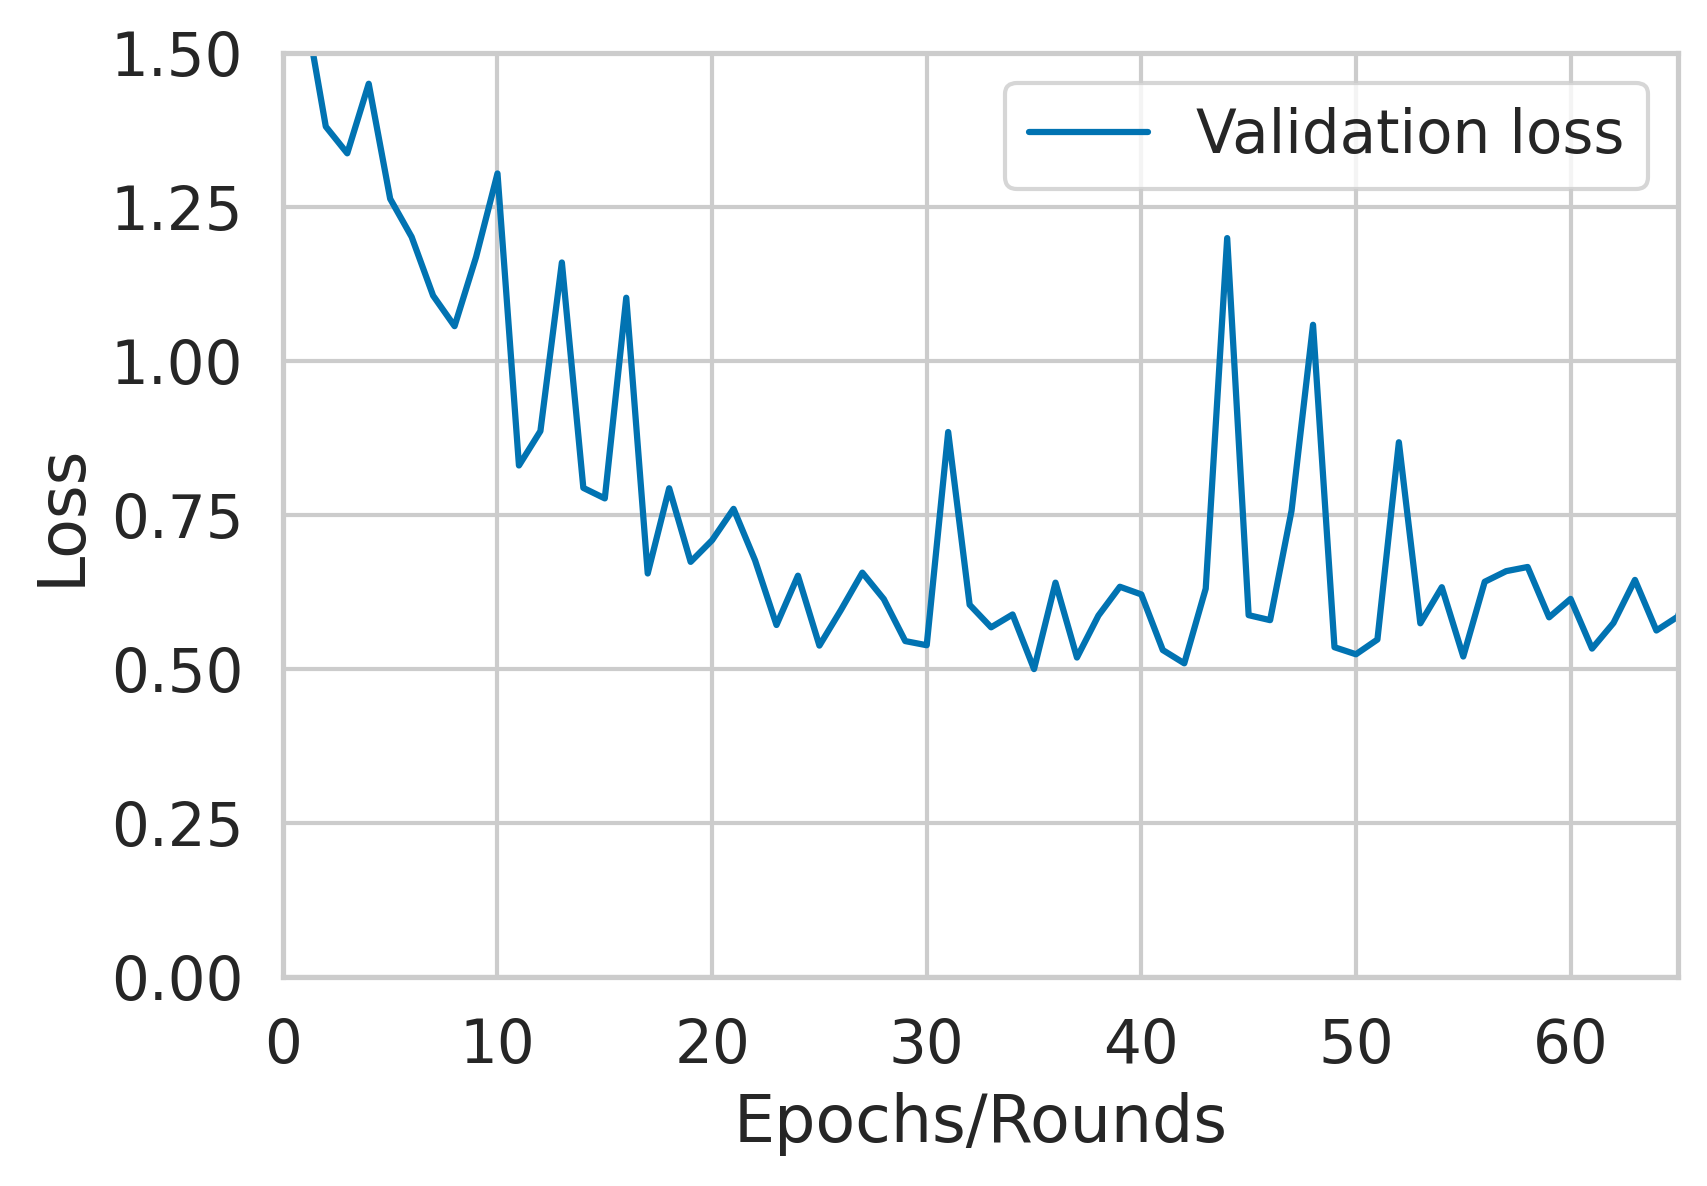

In [23]:
fig, ax = plot_evolution_curves(curves, xy_labels={"x": "Epochs/Rounds", "y": "Loss"}, legends=legends, plot_size=(6, 4), fontsize=10)

In [72]:
# Save the figure to SVG
# fig.savefig(f"../results/curves/paper/8_clients/8_clients_loss_comparison.svg", format="svg", bbox_inches="tight")
# fig.savefig(f"../results/curves/paper/CT_loss_evolution.svg", format="svg", bbox_inches="tight")

In [19]:
# # # Mean of the curves
mean_curves = curves.mean(axis=1).to_frame(name="global_loss")
mean_curves = pd.concat([mean_curves, curves], axis=1)

mean_curves.to_csv(f"../results/curves/non_iid_experiments/2_clients/2_clients_cxr_unbalanced_missing_2co-vp_RS_new_mean.csv")

mean_curves

,global_loss,local_1_validation_loss,local_2_validation_loss
Step,,,
0,1.895492,2.701963,1.089020
1,1.245459,1.779425,0.711492
2,1.055143,1.597272,0.513015
3,0.781377,1.021391,0.541364
4,0.869869,1.342901,0.396836
...,...,...,...
65,0.269126,0.325724,0.212529
66,0.317177,0.396032,0.238321
67,0.295372,0.353392,0.237353
